In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_128/lag_neg16/enc_train_128_lag_neg6.npy')   ###change
stim_resp = np.load('/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_128/lag_neg16/resp_train_128_lag_neg6.npy')  ###change

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((49046, 128), (49046, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins=32, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((49046, 128), (49046, 214))

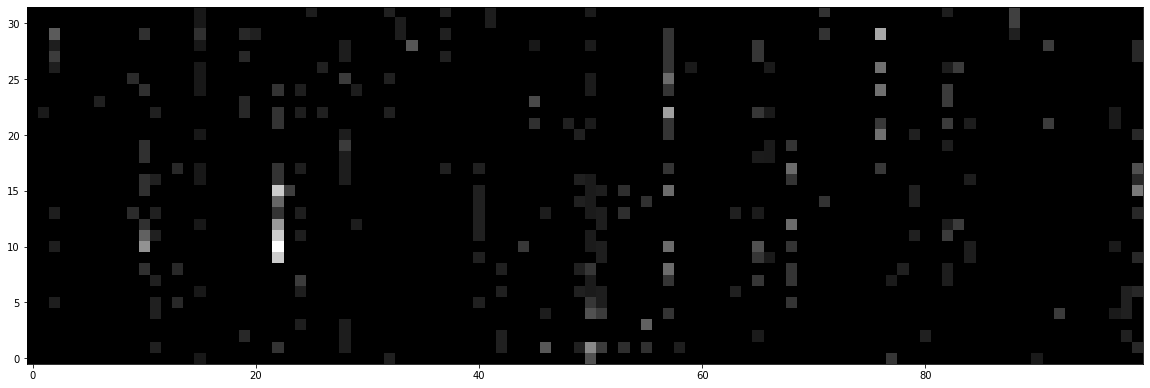

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 20, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
ind = [165, 16, 191, 114, 12, 50, 96, 38, 211, 82, 130, 76, 142, 102, 107, 159, 156,
       66, 67, 206, 110, 93, 122, 125, 187, 68, 80, 81, 205, 147, 186, 63, 170, 51,
       2, 128, 41, 207, 35, 11, 21, 183, 112, 145, 53, 209, 57, 75, 31, 33]
units_to_process_all = np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy')
units_to_process = list(units_to_process_all[ind])

In [12]:
exp_path = '/mnt/cube/srrudrar/temporal_model/stim_resp_32x32_128/lag_neg16/test_set_mne/'                                         ###change

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 32
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.142602
    2       0    0.137045
    3       0    0.132747
    4       0    0.129415
    5       0    0.127905
    6       0    0.126444
    7       0    0.125136
    8       0    0.123619
    9       0    0.122670
   10       0    0.121067
   11       0    0.120220
   12       0    0.119625
   13       0    0.119062
   14       0    0.118552
   15       0    0.117269
   16       0    0.116796
   17       0    0.115509
   18       0    0.114536
   19       0    0.113826
   20       0    0.113389
   21       0    0.112923
   22       0    0.112677
   23       0    0.112489
   24       0    0.112414
   25       0    0.112071
   26       0    0.111872
   27       0    0.111705
   28       0    0.111355
   29       0    0.111227
   30       0    0.111146
   31       0    0.111065
   32       0    0.110612
   33       0    0.110065
   34       0    0.109879
   35       0    0.109680
   36       0    0.109574
   37       0    0.109447
   38       

   29       0    0.109103
   30       0    0.108854
   31       0    0.108790
   32       0    0.108776
   33       0    0.108731
   34       0    0.108551
   35       0    0.108319
   36       0    0.107981
   37       0    0.107508
   38       0    0.107366
   39       0    0.107349
   40       0    0.107151
   41       0    0.106979
   42       0    0.106928
   43       0    0.106821
   44       0    0.106765
   45       0    0.106760
   46       0    0.106673
   47       0    0.106577
   48       0    0.106547
   49       0    0.106536
   50       0    0.106588
   51       1    0.106607
   52       2    0.106489
   53       0    0.106383
   54       0    0.106315
   55       0    0.106306
   56       0    0.106346
   57       1    0.106340
   58       2    0.106298
   59       0    0.106285
   60       0    0.106259
   61       0    0.106263
   62       1    0.106346
   63       2    0.106144
   64       0    0.105960
   65       0    0.105852
   66       0    0.105859
   67       

   15       0    0.097520
   16       0    0.096989
   17       0    0.096270
   18       0    0.096034
   19       0    0.095806
   20       0    0.095503
   21       0    0.095268
   22       0    0.095024
   23       0    0.094890
   24       0    0.094736
   25       0    0.094524
   26       0    0.094272
   27       0    0.094113
   28       0    0.094001
   29       0    0.094005
   30       1    0.093918
   31       0    0.093806
   32       0    0.093727
   33       0    0.093547
   34       0    0.093039
   35       0    0.092428
   36       0    0.092077
   37       0    0.091982
   38       0    0.091954
   39       0    0.091939
   40       0    0.091863
   41       0    0.091843
   42       0    0.091814
   43       0    0.091784
   44       0    0.091751
   45       0    0.091690
   46       0    0.091570
   47       0    0.091543
   48       0    0.091525
   49       0    0.091453
   50       0    0.091376
   51       0    0.091187
   52       0    0.090886
   53       

   69       0    0.089697
   70       0    0.089653
   71       0    0.089666
   72       1    0.089663
   73       2    0.089626
   74       0    0.089603
   75       0    0.089514
   76       0    0.089337
   77       0    0.089339
   78       1    0.089374
   79       2    0.089245
   80       0    0.089159
   81       0    0.089149
   82       0    0.089148
   83       0    0.089194
   84       1    0.089267
   85       2    0.089327
   86       3    0.089253
   87       4    0.089251
   88       5    0.089198
   89       6    0.089147
   90       0    0.089128
   91       0    0.089071
   92       0    0.089059
   93       0    0.089072
   94       1    0.089062
   95       2    0.089079
   96       3    0.089121
   97       4    0.089109
   98       5    0.089087
   99       6    0.089104
  100       7    0.089085
  101       8    0.089046
  102       0    0.089042
  103       0    0.089061
  104       1    0.089041
  105       0    0.089024
  106       0    0.089034
  107       

  115       9    0.089422
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.110115
    2       0    0.109234
    3       0    0.108226
    4       0    0.104001
    5       0    0.101682
    6       0    0.101133
    7       0    0.100464
    8       0    0.099753
    9       0    0.098961
   10       0    0.098240
   11       0    0.097937
   12       0    0.097600
   13       0    0.097193
   14       0    0.096982
   15       0    0.096784
   16       0    0.096249
   17       0    0.095681
   18       0    0.095150
   19       0    0.094653
   20       0    0.094542
   21       0    0.094338
   22       0    0.094208
   23       0    0.094164
   24       0    0.094166
   25       1    0.094091
   26       0    0.093985
   27       0    0.093941
   28       0    0.093878
   29       0    0.093771
   30       0    0.093430
   31       0    0.093161
   32       0    0.092865
   33       0    0.092781
   34       0    0.092428
   35       0    0.092287
   36       

   45       0    0.093105
   46       0    0.093024
   47       0    0.092992
   48       0    0.092921
   49       0    0.092966
   50       1    0.092888
   51       0    0.092802
   52       0    0.092773
   53       0    0.092718
   54       0    0.092621
   55       0    0.092539
   56       0    0.092500
   57       0    0.092480
   58       0    0.092446
   59       0    0.092440
   60       0    0.092428
   61       0    0.092419
   62       0    0.092373
   63       0    0.092360
   64       0    0.092350
   65       0    0.092289
   66       0    0.092288
   67       0    0.092299
   68       1    0.092253
   69       0    0.092209
   70       0    0.092160
   71       0    0.092133
   72       0    0.092123
   73       0    0.092117
   74       0    0.092109
   75       0    0.092105
   76       0    0.092104
   77       0    0.092100
   78       0    0.092109
   79       1    0.092124
   80       2    0.092119
   81       3    0.092122
   82       4    0.092127
   83       

   76       0    0.092066
   77       0    0.092069
   78       1    0.092003
   79       0    0.091980
   80       0    0.091956
   81       0    0.091952
   82       0    0.091946
   83       0    0.091949
   84       1    0.091943
   85       0    0.091925
   86       0    0.091915
   87       0    0.091929
   88       1    0.091940
   89       2    0.091915
   90       3    0.091900
   91       0    0.091847
   92       0    0.091823
   93       0    0.091830
   94       1    0.091800
   95       0    0.091756
   96       0    0.091717
   97       0    0.091726
   98       1    0.091720
   99       2    0.091692
  100       0    0.091678
  101       0    0.091685
  102       1    0.091683
  103       2    0.091684
  104       3    0.091673
  105       0    0.091645
  106       0    0.091646
  107       1    0.091643
  108       0    0.091642
  109       0    0.091649
  110       1    0.091641
  111       0    0.091625
  112       0    0.091618
  113       0    0.091648
  114       

    8       0    0.158651
    9       0    0.157604
   10       0    0.157148
   11       0    0.156370
   12       0    0.155715
   13       0    0.155205
   14       0    0.154831
   15       0    0.154489
   16       0    0.154042
   17       0    0.153925
   18       0    0.153661
   19       0    0.153450
   20       0    0.153254
   21       0    0.153197
   22       0    0.152872
   23       0    0.152623
   24       0    0.152522
   25       0    0.152219
   26       0    0.151928
   27       0    0.151561
   28       0    0.151406
   29       0    0.151300
   30       0    0.151252
   31       0    0.151210
   32       0    0.151153
   33       0    0.151128
   34       0    0.151103
   35       0    0.150978
   36       0    0.150913
   37       0    0.150892
   38       0    0.150826
   39       0    0.150763
   40       0    0.150760
   41       0    0.150784
   42       1    0.150564
   43       0    0.150422
   44       0    0.150339
   45       0    0.150244
   46       

   40       1    0.151626
   41       0    0.151470
   42       0    0.151159
   43       0    0.151095
   44       0    0.150758
   45       0    0.150743
   46       0    0.150508
   47       0    0.150459
   48       0    0.150393
   49       0    0.150277
   50       0    0.150322
   51       1    0.150301
   52       2    0.150300
   53       3    0.150262
   54       0    0.150261
   55       0    0.150189
   56       0    0.150157
   57       0    0.150152
   58       0    0.150107
   59       0    0.150121
   60       1    0.150134
   61       2    0.150110
   62       3    0.150111
   63       4    0.150093
   64       0    0.150043
   65       0    0.150031
   66       0    0.150059
   67       1    0.150049
   68       2    0.149998
   69       0    0.150004
   70       1    0.150008
   71       2    0.149974
   72       0    0.149984
   73       1    0.150024
   74       2    0.149869
   75       0    0.149887
   76       1    0.149775
   77       0    0.149821
   78       

   99       7    0.069923
  100       8    0.069926
  101       9    0.069912
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085617
    2       0    0.082275
    3       0    0.080778
    4       0    0.078765
    5       0    0.077782
    6       0    0.076890
    7       0    0.075786
    8       0    0.074545
    9       0    0.073938
   10       0    0.073471
   11       0    0.073045
   12       0    0.072797
   13       0    0.072724
   14       0    0.072436
   15       0    0.072297
   16       0    0.072168
   17       0    0.072099
   18       0    0.071950
   19       0    0.071190
   20       0    0.070284
   21       0    0.069908
   22       0    0.069561
   23       0    0.069436
   24       0    0.069377
   25       0    0.069303
   26       0    0.069057
   27       0    0.069004
   28       0    0.068961
   29       0    0.068942
   30       0    0.068937
   31       0    0.068873
   32       0    0.068699
   33       0    0.068430
   34       

    1       0    0.082041
    2       0    0.079742
    3       0    0.078505
    4       0    0.077378
    5       0    0.075471
    6       0    0.074830
    7       0    0.074274
    8       0    0.073491
    9       0    0.072838
   10       0    0.072702
   11       0    0.072298
   12       0    0.071641
   13       0    0.071384
   14       0    0.071223
   15       0    0.071094
   16       0    0.070667
   17       0    0.070334
   18       0    0.069911
   19       0    0.069608
   20       0    0.069475
   21       0    0.069401
   22       0    0.069362
   23       0    0.069263
   24       0    0.069175
   25       0    0.069123
   26       0    0.069042
   27       0    0.068934
   28       0    0.068813
   29       0    0.068750
   30       0    0.068649
   31       0    0.068538
   32       0    0.068347
   33       0    0.068243
   34       0    0.068067
   35       0    0.067932
   36       0    0.067897
   37       0    0.067824
   38       0    0.067786
   39       

   70       2    0.066806
   71       3    0.066792
   72       4    0.066784
   73       0    0.066756
   74       0    0.066741
   75       0    0.066744
   76       1    0.066693
   77       0    0.066685
   78       0    0.066721
   79       1    0.066729
   80       2    0.066708
   81       3    0.066699
   82       4    0.066688
   83       5    0.066675
   84       0    0.066673
   85       0    0.066683
   86       1    0.066677
   87       2    0.066638
   88       0    0.066644
   89       1    0.066671
   90       2    0.066658
   91       3    0.066650
   92       4    0.066647
   93       5    0.066652
   94       6    0.066660
   95       7    0.066639
   96       8    0.066663
   97       9    0.066695
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.126210
    2       0    0.123623
    3       0    0.121745
    4       0    0.116075
    5       0    0.114276
    6       0    0.112580
    7       0    0.111453
    8       0    0.110150
    9       

   50       0    0.101354
   51       0    0.101309
   52       0    0.101202
   53       0    0.101112
   54       0    0.101107
   55       0    0.101030
   56       0    0.101000
   57       0    0.101015
   58       1    0.100980
   59       0    0.100916
   60       0    0.100882
   61       0    0.100870
   62       0    0.100833
   63       0    0.100827
   64       0    0.100843
   65       1    0.100771
   66       0    0.100702
   67       0    0.100697
   68       0    0.100689
   69       0    0.100639
   70       0    0.100618
   71       0    0.100617
   72       0    0.100559
   73       0    0.100515
   74       0    0.100513
   75       0    0.100526
   76       1    0.100514
   77       2    0.100508
   78       0    0.100534
   79       1    0.100537
   80       2    0.100442
   81       0    0.100385
   82       0    0.100393
   83       1    0.100358
   84       0    0.100300
   85       0    0.100275
   86       0    0.100297
   87       1    0.100306
   88       

   81       0    0.079226
   82       0    0.079219
   83       0    0.079216
   84       0    0.079218
   85       1    0.079223
   86       2    0.079202
   87       0    0.079186
   88       0    0.079183
   89       0    0.079173
   90       0    0.079169
   91       0    0.079147
   92       0    0.079132
   93       0    0.079122
   94       0    0.079123
   95       1    0.079127
   96       2    0.079118
   97       0    0.079105
   98       0    0.079098
   99       0    0.079106
  100       1    0.079111
  101       2    0.079101
  102       3    0.079092
  103       0    0.079080
  104       0    0.079061
  105       0    0.079049
  106       0    0.079039
  107       0    0.079033
  108       0    0.079015
  109       0    0.079008
  110       0    0.078990
  111       0    0.078981
  112       0    0.078972
  113       0    0.078968
  114       0    0.078969
  115       1    0.078964
  116       0    0.078960
  117       0    0.078964
  118       1    0.078987
  119       

   20       0    0.080670
   21       0    0.080452
   22       0    0.080380
   23       0    0.080202
   24       0    0.080121
   25       0    0.080036
   26       0    0.080013
   27       0    0.079859
   28       0    0.079815
   29       0    0.079729
   30       0    0.079584
   31       0    0.079378
   32       0    0.079313
   33       0    0.079226
   34       0    0.079169
   35       0    0.079139
   36       0    0.079024
   37       0    0.078983
   38       0    0.078960
   39       0    0.078950
   40       0    0.078904
   41       0    0.078886
   42       0    0.078842
   43       0    0.078793
   44       0    0.078767
   45       0    0.078700
   46       0    0.078680
   47       0    0.078666
   48       0    0.078623
   49       0    0.078589
   50       0    0.078571
   51       0    0.078564
   52       0    0.078516
   53       0    0.078488
   54       0    0.078460
   55       0    0.078450
   56       0    0.078439
   57       0    0.078410
   58       

  106       3    0.115642
  107       0    0.115629
  108       0    0.115681
  109       1    0.115692
  110       2    0.115661
  111       3    0.115659
  112       4    0.115682
  113       5    0.115701
  114       6    0.115670
  115       7    0.115655
  116       8    0.115674
  117       9    0.115678
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.134729
    2       0    0.132626
    3       0    0.130092
    4       0    0.128434
    5       0    0.126824
    6       0    0.125597
    7       0    0.124666
    8       0    0.124283
    9       0    0.123647
   10       0    0.123156
   11       0    0.122808
   12       0    0.122224
   13       0    0.121823
   14       0    0.121364
   15       0    0.121162
   16       0    0.120992
   17       0    0.120845
   18       0    0.120445
   19       0    0.119989
   20       0    0.119602
   21       0    0.119329
   22       0    0.119209
   23       0    0.119026
   24       0    0.118710
   25       

   81       2    0.216776
   82       0    0.216711
   83       0    0.216733
   84       1    0.216752
   85       2    0.216629
   86       0    0.216589
   87       0    0.216627
   88       1    0.216559
   89       0    0.216511
   90       0    0.216396
   91       0    0.216367
   92       0    0.216343
   93       0    0.216330
   94       0    0.216294
   95       0    0.216282
   96       0    0.216264
   97       0    0.216266
   98       1    0.216271
   99       2    0.216271
  100       3    0.216249
  101       0    0.216234
  102       0    0.216238
  103       1    0.216234
  104       0    0.216237
  105       1    0.216232
  106       0    0.216217
  107       0    0.216243
  108       1    0.216281
  109       2    0.216193
  110       0    0.216147
  111       0    0.216164
  112       1    0.216171
  113       2    0.216093
  114       0    0.216052
  115       0    0.216053
  116       1    0.216043
  117       0    0.216050
  118       1    0.216048
  119       

   45       0    0.217892
   46       0    0.217710
   47       0    0.217609
   48       0    0.217552
   49       0    0.217500
   50       0    0.217485
   51       0    0.217462
   52       0    0.217460
   53       0    0.217437
   54       0    0.217360
   55       0    0.217282
   56       0    0.217264
   57       0    0.217252
   58       0    0.217113
   59       0    0.216988
   60       0    0.216972
   61       0    0.216952
   62       0    0.216913
   63       0    0.216909
   64       0    0.216760
   65       0    0.216388
   66       0    0.216261
   67       0    0.216000
   68       0    0.215958
   69       0    0.216004
   70       1    0.215707
   71       0    0.215535
   72       0    0.215486
   73       0    0.215449
   74       0    0.215435
   75       0    0.215422
   76       0    0.215396
   77       0    0.215387
   78       0    0.215398
   79       1    0.215384
   80       0    0.215334
   81       0    0.215322
   82       0    0.215265
   83       

   42       0    0.082886
   43       1    0.082892
   44       2    0.082852
   45       0    0.082861
   46       1    0.082873
   47       2    0.082748
   48       0    0.082660
   49       0    0.082622
   50       0    0.082647
   51       1    0.082636
   52       2    0.082558
   53       0    0.082553
   54       0    0.082491
   55       0    0.082471
   56       0    0.082359
   57       0    0.082358
   58       0    0.082310
   59       0    0.082351
   60       1    0.082334
   61       2    0.082257
   62       0    0.082245
   63       0    0.082197
   64       0    0.082180
   65       0    0.082197
   66       1    0.082163
   67       0    0.082185
   68       1    0.082193
   69       2    0.082164
   70       3    0.082168
   71       4    0.082123
   72       0    0.082096
   73       0    0.082125
   74       1    0.082109
   75       2    0.082073
   76       0    0.082065
   77       0    0.082078
   78       1    0.082031
   79       0    0.082045
   80       

   40       0    0.080740
   41       0    0.080713
   42       0    0.080603
   43       0    0.080492
   44       0    0.080438
   45       0    0.080367
   46       0    0.080359
   47       0    0.080354
   48       0    0.080218
   49       0    0.080096
   50       0    0.080065
   51       0    0.080061
   52       0    0.080032
   53       0    0.080033
   54       1    0.080051
   55       2    0.080063
   56       3    0.080098
   57       4    0.080069
   58       5    0.080058
   59       6    0.080031
   60       0    0.080019
   61       0    0.080018
   62       0    0.079958
   63       0    0.079896
   64       0    0.079868
   65       0    0.079928
   66       1    0.079919
   67       2    0.079886
   68       3    0.079830
   69       0    0.079751
   70       0    0.079771
   71       1    0.079763
   72       2    0.079743
   73       0    0.079779
   74       1    0.079807
   75       2    0.079829
   76       3    0.079798
   77       4    0.079782
   78       

   77       0    0.036191
   78       0    0.036192
   79       1    0.036191
   80       2    0.036181
   81       0    0.036178
   82       0    0.036172
   83       0    0.036156
   84       0    0.036153
   85       0    0.036141
   86       0    0.036139
   87       0    0.036140
   88       1    0.036148
   89       2    0.036153
   90       3    0.036134
   91       0    0.036110
   92       0    0.036070
   93       0    0.036059
   94       0    0.036087
   95       1    0.036089
   96       2    0.036048
   97       0    0.036037
   98       0    0.036021
   99       0    0.036027
  100       1    0.036031
  101       2    0.036040
  102       3    0.036037
  103       4    0.036032
  104       5    0.036033
  105       6    0.036044
  106       7    0.036042
  107       8    0.036045
  108       9    0.036042
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.043014
    2       0    0.042495
    3       0    0.042099
    4       0    0.041717
    5       

    2       0    0.136458
    3       0    0.135268
    4       0    0.134533
    5       0    0.134125
    6       0    0.133116
    7       0    0.132771
    8       0    0.132486
    9       0    0.132190
   10       0    0.132184
   11       0    0.132025
   12       0    0.131844
   13       0    0.131556
   14       0    0.131434
   15       0    0.131014
   16       0    0.130694
   17       0    0.130517
   18       0    0.130108
   19       0    0.129627
   20       0    0.129361
   21       0    0.129306
   22       0    0.129255
   23       0    0.129125
   24       0    0.129010
   25       0    0.128920
   26       0    0.128859
   27       0    0.128788
   28       0    0.128665
   29       0    0.128577
   30       0    0.128453
   31       0    0.128393
   32       0    0.128402
   33       1    0.128399
   34       2    0.128283
   35       0    0.128223
   36       0    0.128177
   37       0    0.128132
   38       0    0.128111
   39       0    0.128116
   40       

  177       7    0.125753
  178       0    0.125728
  179       0    0.125731
  180       1    0.125732
  181       2    0.125738
  182       3    0.125732
  183       4    0.125740
  184       5    0.125752
  185       6    0.125773
  186       7    0.125775
  187       8    0.125795
  188       9    0.125805
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.137304
    2       0    0.136637
    3       0    0.135532
    4       0    0.134898
    5       0    0.134584
    6       0    0.134179
    7       0    0.133640
    8       0    0.133201
    9       0    0.132704
   10       0    0.132097
   11       0    0.131713
   12       0    0.131539
   13       0    0.131083
   14       0    0.130996
   15       0    0.130827
   16       0    0.130721
   17       0    0.130510
   18       0    0.130404
   19       0    0.130100
   20       0    0.129817
   21       0    0.129682
   22       0    0.129369
   23       0    0.129156
   24       0    0.128966
   25       

    5       0    0.530362
    6       0    0.529427
    7       0    0.528918
    8       0    0.528665
    9       0    0.527707
   10       0    0.526038
   11       0    0.525307
   12       0    0.524395
   13       0    0.523956
   14       0    0.523516
   15       0    0.523327
   16       0    0.523172
   17       0    0.522518
   18       0    0.522252
   19       0    0.521495
   20       0    0.521104
   21       0    0.520806
   22       0    0.520461
   23       0    0.520281
   24       0    0.520231
   25       0    0.520064
   26       0    0.519987
   27       0    0.519967
   28       0    0.519937
   29       0    0.519747
   30       0    0.519682
   31       0    0.519482
   32       0    0.519273
   33       0    0.519117
   34       0    0.519020
   35       0    0.518919
   36       0    0.518647
   37       0    0.518449
   38       0    0.518424
   39       0    0.518332
   40       0    0.518255
   41       0    0.518229
   42       0    0.518122
   43       

  129       1    0.516172
  130       2    0.516166
  131       3    0.516181
  132       4    0.516197
  133       5    0.516192
  134       6    0.516179
  135       7    0.516181
  136       8    0.516170
  137       9    0.516135
  138       0    0.516141
  139       1    0.516158
  140       2    0.516139
  141       3    0.516150
  142       4    0.516141
  143       5    0.516142
  144       6    0.516140
  145       7    0.516130
  146       0    0.516123
  147       0    0.516115
  148       0    0.516110
  149       0    0.516114
  150       1    0.516122
  151       2    0.516120
  152       3    0.516109
  153       0    0.516109
  154       1    0.516113
  155       2    0.516111
  156       3    0.516108
  157       0    0.516113
  158       1    0.516126
  159       2    0.516120
  160       3    0.516107
  161       0    0.516112
  162       1    0.516114
  163       2    0.516105
  164       0    0.516106
  165       1    0.516098
  166       0    0.516100
  167       

   45       0    0.479138
   46       0    0.479092
   47       0    0.479070
   48       0    0.479053
   49       0    0.479006
   50       0    0.478972
   51       0    0.478953
   52       0    0.478966
   53       1    0.478982
   54       2    0.478921
   55       0    0.478851
   56       0    0.478849
   57       0    0.478839
   58       0    0.478796
   59       0    0.478752
   60       0    0.478595
   61       0    0.478445
   62       0    0.478199
   63       0    0.478097
   64       0    0.477680
   65       0    0.477541
   66       0    0.477429
   67       0    0.477387
   68       0    0.477324
   69       0    0.477301
   70       0    0.477294
   71       0    0.477278
   72       0    0.477237
   73       0    0.477160
   74       0    0.477124
   75       0    0.477019
   76       0    0.476996
   77       0    0.476998
   78       1    0.477018
   79       2    0.477004
   80       3    0.476952
   81       0    0.476892
   82       0    0.476822
   83       

   43       0    0.477739
   44       0    0.477793
   45       1    0.477740
   46       2    0.477502
   47       0    0.477374
   48       0    0.477308
   49       0    0.477225
   50       0    0.477193
   51       0    0.477166
   52       0    0.477096
   53       0    0.477077
   54       0    0.477073
   55       0    0.477003
   56       0    0.476932
   57       0    0.476868
   58       0    0.476878
   59       1    0.476779
   60       0    0.476697
   61       0    0.476702
   62       1    0.476667
   63       0    0.476623
   64       0    0.476579
   65       0    0.476605
   66       1    0.476604
   67       2    0.476502
   68       0    0.476489
   69       0    0.476516
   70       1    0.476409
   71       0    0.476445
   72       1    0.476415
   73       2    0.476278
   74       0    0.476307
   75       1    0.476015
   76       0    0.475904
   77       0    0.475957
   78       1    0.475899
   79       0    0.475833
   80       0    0.475825
   81       

   75       0    0.127673
   76       0    0.127695
   77       1    0.127695
   78       2    0.127661
   79       0    0.127649
   80       0    0.127687
   81       1    0.127661
   82       2    0.127699
   83       3    0.127677
   84       4    0.127561
   85       0    0.127506
   86       0    0.127520
   87       1    0.127491
   88       0    0.127520
   89       1    0.127499
   90       2    0.127411
   91       0    0.127438
   92       1    0.127433
   93       2    0.127396
   94       0    0.127408
   95       1    0.127432
   96       2    0.127416
   97       3    0.127382
   98       0    0.127413
   99       1    0.127434
  100       2    0.127368
  101       0    0.127348
  102       0    0.127380
  103       1    0.127350
  104       2    0.127355
  105       3    0.127399
  106       4    0.127314
  107       0    0.127345
  108       1    0.127299
  109       0    0.127340
  110       1    0.127233
  111       0    0.127119
  112       0    0.127138
  113       

  118       7    0.127142
  119       8    0.127131
  120       9    0.127149
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.227724
    2       0    0.223936
    3       0    0.221726
    4       0    0.221166
    5       0    0.220516
    6       0    0.217988
    7       0    0.216998
    8       0    0.216498
    9       0    0.215426
   10       0    0.214822
   11       0    0.214366
   12       0    0.213817
   13       0    0.213705
   14       0    0.213250
   15       0    0.212608
   16       0    0.212362
   17       0    0.212010
   18       0    0.211675
   19       0    0.211553
   20       0    0.211292
   21       0    0.210710
   22       0    0.210487
   23       0    0.210115
   24       0    0.209927
   25       0    0.209876
   26       0    0.209783
   27       0    0.209511
   28       0    0.209470
   29       0    0.209445
   30       0    0.209366
   31       0    0.209267
   32       0    0.209227
   33       0    0.209190
   34       

   26       0    0.206600
   27       0    0.206199
   28       0    0.205693
   29       0    0.205250
   30       0    0.205032
   31       0    0.204715
   32       0    0.204604
   33       0    0.204440
   34       0    0.204310
   35       0    0.204171
   36       0    0.204096
   37       0    0.204087
   38       0    0.203999
   39       0    0.203930
   40       0    0.203878
   41       0    0.203824
   42       0    0.203803
   43       0    0.203780
   44       0    0.203741
   45       0    0.203738
   46       0    0.203744
   47       1    0.203714
   48       0    0.203692
   49       0    0.203682
   50       0    0.203663
   51       0    0.203612
   52       0    0.203580
   53       0    0.203575
   54       0    0.203555
   55       0    0.203545
   56       0    0.203513
   57       0    0.203446
   58       0    0.203290
   59       0    0.203039
   60       0    0.202674
   61       0    0.202655
   62       0    0.202526
   63       0    0.202502
   64       

   94       0    0.364254
   95       0    0.364256
   96       1    0.364255
   97       2    0.364241
   98       0    0.364213
   99       0    0.364238
  100       1    0.364261
  101       2    0.364369
  102       3    0.364322
  103       4    0.364226
  104       5    0.364139
  105       0    0.364073
  106       0    0.364030
  107       0    0.364006
  108       0    0.363962
  109       0    0.363952
  110       0    0.363955
  111       1    0.363951
  112       0    0.363951
  113       1    0.363936
  114       0    0.363923
  115       0    0.363907
  116       0    0.363912
  117       1    0.363904
  118       0    0.363873
  119       0    0.363872
  120       0    0.363858
  121       0    0.363836
  122       0    0.363836
  123       0    0.363826
  124       0    0.363816
  125       0    0.363820
  126       1    0.363830
  127       2    0.363830
  128       3    0.363819
  129       4    0.363823
  130       5    0.363814
  131       0    0.363797
  132       

  122       0    0.366589
  123       0    0.366549
  124       0    0.366543
  125       0    0.366549
  126       1    0.366543
  127       2    0.366554
  128       3    0.366561
  129       4    0.366549
  130       5    0.366530
  131       0    0.366524
  132       0    0.366520
  133       0    0.366528
  134       1    0.366526
  135       2    0.366517
  136       0    0.366511
  137       0    0.366520
  138       1    0.366512
  139       2    0.366495
  140       0    0.366505
  141       1    0.366476
  142       0    0.366323
  143       0    0.366187
  144       0    0.366213
  145       1    0.366222
  146       2    0.366171
  147       0    0.366143
  148       0    0.366157
  149       1    0.366150
  150       2    0.366129
  151       0    0.366139
  152       1    0.366154
  153       2    0.366130
  154       3    0.366098
  155       0    0.366147
  156       1    0.366175
  157       2    0.366125
  158       3    0.366094
  159       0    0.366099
  160       

   56       0    0.154979
   57       0    0.154972
   58       0    0.154931
   59       0    0.154894
   60       0    0.154850
   61       0    0.154802
   62       0    0.154783
   63       0    0.154761
   64       0    0.154738
   65       0    0.154682
   66       0    0.154682
   67       1    0.154707
   68       2    0.154651
   69       0    0.154583
   70       0    0.154594
   71       1    0.154440
   72       0    0.154330
   73       0    0.154259
   74       0    0.154396
   75       1    0.154457
   76       2    0.154265
   77       3    0.154186
   78       0    0.154148
   79       0    0.154082
   80       0    0.154086
   81       1    0.154131
   82       2    0.154080
   83       0    0.154016
   84       0    0.153952
   85       0    0.153939
   86       0    0.153890
   87       0    0.153867
   88       0    0.153898
   89       1    0.153892
   90       2    0.153874
   91       3    0.153851
   92       0    0.153849
   93       0    0.153822
   94       

   62       0    0.154850
   63       1    0.154786
   64       0    0.154711
   65       0    0.154665
   66       0    0.154644
   67       0    0.154649
   68       1    0.154615
   69       0    0.154587
   70       0    0.154544
   71       0    0.154538
   72       0    0.154549
   73       1    0.154535
   74       0    0.154534
   75       0    0.154531
   76       0    0.154478
   77       0    0.154458
   78       0    0.154461
   79       1    0.154456
   80       0    0.154431
   81       0    0.154429
   82       0    0.154458
   83       1    0.154407
   84       0    0.154334
   85       0    0.154280
   86       0    0.154189
   87       0    0.154232
   88       1    0.154123
   89       0    0.154149
   90       1    0.154068
   91       0    0.154024
   92       0    0.154033
   93       1    0.153976
   94       0    0.153959
   95       0    0.153905
   96       0    0.153842
   97       0    0.153856
   98       1    0.153817
   99       0    0.153793
  100       

   32       0    0.081844
   33       0    0.081828
   34       0    0.081796
   35       0    0.081749
   36       0    0.081719
   37       0    0.081703
   38       0    0.081661
   39       0    0.081550
   40       0    0.081334
   41       0    0.081321
   42       0    0.081263
   43       0    0.081224
   44       0    0.081197
   45       0    0.081192
   46       0    0.081154
   47       0    0.081058
   48       0    0.081052
   49       0    0.081068
   50       1    0.081006
   51       0    0.080957
   52       0    0.080966
   53       1    0.080967
   54       2    0.080937
   55       0    0.080924
   56       0    0.080925
   57       1    0.080929
   58       2    0.080912
   59       0    0.080933
   60       1    0.080951
   61       2    0.080899
   62       0    0.080873
   63       0    0.080881
   64       1    0.080880
   65       2    0.080849
   66       0    0.080868
   67       1    0.080851
   68       2    0.080874
   69       3    0.080934
   70       

   58       7    0.045351
   59       8    0.045200
   60       9    0.045300
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.055599
    2       0    0.053358
    3       0    0.053915
    4       1    0.052961
    5       0    0.050666
    6       0    0.048646
    7       0    0.047626
    8       0    0.047075
    9       0    0.046938
   10       0    0.046778
   11       0    0.045992
   12       0    0.045766
   13       0    0.045471
   14       0    0.045391
   15       0    0.045090
   16       0    0.044724
   17       0    0.044436
   18       0    0.044354
   19       0    0.043987
   20       0    0.043898
   21       0    0.043842
   22       0    0.043620
   23       0    0.043285
   24       0    0.043301
   25       1    0.043259
   26       0    0.043241
   27       0    0.043387
   28       1    0.043482
   29       2    0.044098
   30       3    0.044450
   31       4    0.043876
   32       5    0.043388
   33       6    0.043568
   34       

   25       0    0.076396
   26       0    0.076315
   27       0    0.076116
   28       0    0.076015
   29       0    0.075872
   30       0    0.075793
   31       0    0.075527
   32       0    0.075379
   33       0    0.075217
   34       0    0.075097
   35       0    0.075143
   36       1    0.075117
   37       2    0.074934
   38       0    0.074919
   39       0    0.074871
   40       0    0.074830
   41       0    0.074848
   42       1    0.074866
   43       2    0.074746
   44       0    0.074567
   45       0    0.074504
   46       0    0.074355
   47       0    0.074238
   48       0    0.074233
   49       0    0.074209
   50       0    0.074185
   51       0    0.074177
   52       0    0.074141
   53       0    0.074167
   54       1    0.074115
   55       0    0.073964
   56       0    0.073771
   57       0    0.073763
   58       0    0.073676
   59       0    0.073566
   60       0    0.073506
   61       0    0.073477
   62       0    0.073476
   63       

    7       0    0.478610
    8       0    0.475834
    9       0    0.474769
   10       0    0.473630
   11       0    0.472784
   12       0    0.472474
   13       0    0.471703
   14       0    0.471259
   15       0    0.471088
   16       0    0.470246
   17       0    0.469897
   18       0    0.469627
   19       0    0.469557
   20       0    0.469311
   21       0    0.469019
   22       0    0.468862
   23       0    0.468868
   24       1    0.468550
   25       0    0.468275
   26       0    0.468012
   27       0    0.467971
   28       0    0.467848
   29       0    0.467693
   30       0    0.467593
   31       0    0.467429
   32       0    0.467248
   33       0    0.467147
   34       0    0.467096
   35       0    0.466982
   36       0    0.466847
   37       0    0.466783
   38       0    0.466639
   39       0    0.466453
   40       0    0.466188
   41       0    0.466058
   42       0    0.465761
   43       0    0.465671
   44       0    0.465593
   45       

   33       0    0.471013
   34       0    0.470966
   35       0    0.470971
   36       1    0.470921
   37       0    0.470804
   38       0    0.470778
   39       0    0.470295
   40       0    0.470030
   41       0    0.469784
   42       0    0.469386
   43       0    0.469089
   44       0    0.468900
   45       0    0.468847
   46       0    0.468695
   47       0    0.468630
   48       0    0.468632
   49       1    0.468568
   50       0    0.468501
   51       0    0.468442
   52       0    0.468415
   53       0    0.468400
   54       0    0.468326
   55       0    0.468297
   56       0    0.468324
   57       1    0.468308
   58       2    0.468244
   59       0    0.468204
   60       0    0.468155
   61       0    0.468137
   62       0    0.468114
   63       0    0.468112
   64       0    0.468110
   65       0    0.468072
   66       0    0.467991
   67       0    0.467997
   68       1    0.467877
   69       0    0.467561
   70       0    0.467202
   71       

   61       0    0.132865
   62       0    0.132828
   63       0    0.132789
   64       0    0.132713
   65       0    0.132675
   66       0    0.132544
   67       0    0.132403
   68       0    0.132380
   69       0    0.132333
   70       0    0.132303
   71       0    0.132232
   72       0    0.132202
   73       0    0.132193
   74       0    0.132174
   75       0    0.132178
   76       1    0.132161
   77       0    0.132129
   78       0    0.132096
   79       0    0.132112
   80       1    0.132121
   81       2    0.132117
   82       3    0.132096
   83       4    0.132077
   84       0    0.132073
   85       0    0.132072
   86       0    0.132063
   87       0    0.132052
   88       0    0.132042
   89       0    0.132013
   90       0    0.132007
   91       0    0.132013
   92       1    0.132007
   93       2    0.131987
   94       0    0.131995
   95       1    0.132005
   96       2    0.131989
   97       3    0.131981
   98       0    0.131975
   99       

   51       0    0.130445
   52       0    0.130316
   53       0    0.130284
   54       0    0.130256
   55       0    0.130226
   56       0    0.130203
   57       0    0.130185
   58       0    0.130137
   59       0    0.130106
   60       0    0.130105
   61       0    0.130083
   62       0    0.130051
   63       0    0.130033
   64       0    0.129989
   65       0    0.129927
   66       0    0.129864
   67       0    0.129864
   68       0    0.129814
   69       0    0.129814
   70       0    0.129775
   71       0    0.129874
   72       1    0.129986
   73       2    0.129900
   74       3    0.129852
   75       4    0.129775
   76       5    0.129724
   77       0    0.129692
   78       0    0.129568
   79       0    0.129543
   80       0    0.129564
   81       1    0.129504
   82       0    0.129485
   83       0    0.129447
   84       0    0.129415
   85       0    0.129396
   86       0    0.129403
   87       1    0.129365
   88       0    0.129360
   89       

   33       1    0.043030
   34       2    0.042839
   35       0    0.042824
   36       0    0.042779
   37       0    0.042735
   38       0    0.042724
   39       0    0.042642
   40       0    0.042639
   41       0    0.042613
   42       0    0.042607
   43       0    0.042518
   44       0    0.042460
   45       0    0.042313
   46       0    0.042280
   47       0    0.042203
   48       0    0.042104
   49       0    0.042068
   50       0    0.042038
   51       0    0.042065
   52       1    0.042007
   53       0    0.041938
   54       0    0.042010
   55       1    0.042071
   56       2    0.041921
   57       0    0.041817
   58       0    0.041788
   59       0    0.041784
   60       0    0.041741
   61       0    0.041703
   62       0    0.041689
   63       0    0.041594
   64       0    0.041596
   65       1    0.041574
   66       0    0.041580
   67       1    0.041636
   68       2    0.041651
   69       3    0.041582
   70       4    0.041575
   71       

   40       3    0.042309
   41       4    0.042337
   42       5    0.042303
   43       6    0.042265
   44       0    0.042161
   45       0    0.041891
   46       0    0.041804
   47       0    0.041853
   48       1    0.041838
   49       2    0.041670
   50       0    0.041425
   51       0    0.041376
   52       0    0.041438
   53       1    0.041472
   54       2    0.041351
   55       0    0.041320
   56       0    0.041356
   57       1    0.041277
   58       0    0.041159
   59       0    0.041095
   60       0    0.041097
   61       1    0.041168
   62       2    0.041192
   63       3    0.041155
   64       4    0.041149
   65       5    0.041266
   66       6    0.041294
   67       7    0.041272
   68       8    0.041250
   69       9    0.041195
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238533
    2       0    0.233957
    3       0    0.229478
    4       0    0.228053
    5       0    0.224997
    6       0    0.223258
    7       

  164       4    0.203418
  165       5    0.203398
  166       0    0.203405
  167       1    0.203408
  168       2    0.203401
  169       3    0.203409
  170       4    0.203404
  171       5    0.203412
  172       6    0.203428
  173       7    0.203405
  174       8    0.203404
  175       9    0.203395
  176       0    0.203424
  177       1    0.203420
  178       2    0.203459
  179       3    0.203460
  180       4    0.203424
  181       5    0.203403
  182       6    0.203413
  183       7    0.203399
  184       8    0.203413
  185       9    0.203417
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.239812
    2       0    0.235827
    3       0    0.231136
    4       0    0.229226
    5       0    0.225464
    6       0    0.223783
    7       0    0.222154
    8       0    0.221464
    9       0    0.220022
   10       0    0.218589
   11       0    0.217596
   12       0    0.216984
   13       0    0.216469
   14       0    0.216120
   15       

    7       0    0.044979
    8       0    0.044308
    9       0    0.043726
   10       0    0.043430
   11       0    0.043374
   12       0    0.043154
   13       0    0.042966
   14       0    0.042707
   15       0    0.042471
   16       0    0.042387
   17       0    0.042239
   18       0    0.042226
   19       0    0.042027
   20       0    0.041998
   21       0    0.042007
   22       1    0.041809
   23       0    0.041778
   24       0    0.041701
   25       0    0.041671
   26       0    0.041615
   27       0    0.041521
   28       0    0.041494
   29       0    0.041427
   30       0    0.041356
   31       0    0.041349
   32       0    0.041240
   33       0    0.041211
   34       0    0.041029
   35       0    0.041005
   36       0    0.040966
   37       0    0.040812
   38       0    0.040815
   39       1    0.040818
   40       2    0.040830
   41       3    0.040807
   42       0    0.040772
   43       0    0.040798
   44       1    0.040789
   45       

   20       0    0.238287
   21       0    0.237779
   22       0    0.237200
   23       0    0.236757
   24       0    0.236149
   25       0    0.235834
   26       0    0.235601
   27       0    0.235534
   28       0    0.235408
   29       0    0.235283
   30       0    0.235273
   31       0    0.235254
   32       0    0.235088
   33       0    0.235021
   34       0    0.234940
   35       0    0.234955
   36       1    0.234988
   37       2    0.234852
   38       0    0.234761
   39       0    0.234722
   40       0    0.234670
   41       0    0.234527
   42       0    0.234409
   43       0    0.233795
   44       0    0.233590
   45       0    0.233551
   46       0    0.233492
   47       0    0.233017
   48       0    0.232871
   49       0    0.232859
   50       0    0.232719
   51       0    0.232484
   52       0    0.232477
   53       0    0.232470
   54       0    0.232412
   55       0    0.232297
   56       0    0.232207
   57       0    0.232251
   58       

   38       0    0.238103
   39       0    0.237985
   40       0    0.237948
   41       0    0.237797
   42       0    0.237644
   43       0    0.237572
   44       0    0.237487
   45       0    0.237488
   46       1    0.237385
   47       0    0.237295
   48       0    0.237245
   49       0    0.237058
   50       0    0.236922
   51       0    0.236844
   52       0    0.236711
   53       0    0.236615
   54       0    0.236649
   55       1    0.236674
   56       2    0.236640
   57       3    0.236568
   58       0    0.236551
   59       0    0.236520
   60       0    0.236528
   61       1    0.236471
   62       0    0.236379
   63       0    0.236361
   64       0    0.236327
   65       0    0.236317
   66       0    0.236329
   67       1    0.236298
   68       0    0.236225
   69       0    0.236231
   70       1    0.236181
   71       0    0.236052
   72       0    0.236012
   73       0    0.235932
   74       0    0.235828
   75       0    0.235681
   76       

   95       2    0.318988
   96       0    0.318974
   97       0    0.318940
   98       0    0.318915
   99       0    0.318882
  100       0    0.318853
  101       0    0.318815
  102       0    0.318791
  103       0    0.318752
  104       0    0.318750
  105       0    0.318751
  106       1    0.318760
  107       2    0.318760
  108       3    0.318756
  109       4    0.318724
  110       0    0.318695
  111       0    0.318670
  112       0    0.318625
  113       0    0.318604
  114       0    0.318570
  115       0    0.318553
  116       0    0.318531
  117       0    0.318525
  118       0    0.318519
  119       0    0.318509
  120       0    0.318498
  121       0    0.318482
  122       0    0.318475
  123       0    0.318467
  124       0    0.318466
  125       0    0.318464
  126       0    0.318460
  127       0    0.318436
  128       0    0.318420
  129       0    0.318413
  130       0    0.318410
  131       0    0.318404
  132       0    0.318396
  133       

  104       1    0.313206
  105       0    0.313195
  106       0    0.313179
  107       0    0.313182
  108       1    0.313182
  109       2    0.313189
  110       3    0.313166
  111       0    0.313152
  112       0    0.313139
  113       0    0.313161
  114       1    0.313154
  115       2    0.313074
  116       0    0.313057
  117       0    0.313005
  118       0    0.313004
  119       0    0.312976
  120       0    0.312977
  121       1    0.312968
  122       0    0.312946
  123       0    0.312949
  124       1    0.312932
  125       0    0.312925
  126       0    0.312931
  127       1    0.312924
  128       0    0.312915
  129       0    0.312930
  130       1    0.312940
  131       2    0.312931
  132       3    0.312930
  133       4    0.312936
  134       5    0.312931
  135       6    0.312922
  136       7    0.312922
  137       8    0.312925
  138       9    0.312918
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.344947
    2       

   82       0    0.060972
   83       0    0.060949
   84       0    0.060936
   85       0    0.060922
   86       0    0.060898
   87       0    0.060892
   88       0    0.060881
   89       0    0.060859
   90       0    0.060852
   91       0    0.060845
   92       0    0.060845
   93       0    0.060844
   94       0    0.060836
   95       0    0.060832
   96       0    0.060829
   97       0    0.060822
   98       0    0.060813
   99       0    0.060811
  100       0    0.060803
  101       0    0.060790
  102       0    0.060742
  103       0    0.060728
  104       0    0.060691
  105       0    0.060667
  106       0    0.060643
  107       0    0.060633
  108       0    0.060634
  109       1    0.060628
  110       0    0.060629
  111       1    0.060642
  112       2    0.060643
  113       3    0.060622
  114       0    0.060632
  115       1    0.060675
  116       2    0.060677
  117       3    0.060689
  118       4    0.060683
  119       5    0.060646
  120       

    7       0    0.067416
    8       0    0.066303
    9       0    0.065911
   10       0    0.065687
   11       0    0.065199
   12       0    0.065109
   13       0    0.064832
   14       0    0.064416
   15       0    0.064097
   16       0    0.063860
   17       0    0.063637
   18       0    0.063297
   19       0    0.063223
   20       0    0.062986
   21       0    0.062741
   22       0    0.062710
   23       0    0.062576
   24       0    0.062382
   25       0    0.062287
   26       0    0.062114
   27       0    0.061933
   28       0    0.061911
   29       0    0.061797
   30       0    0.061713
   31       0    0.061697
   32       0    0.061629
   33       0    0.061535
   34       0    0.061356
   35       0    0.061364
   36       1    0.061246
   37       0    0.061157
   38       0    0.061145
   39       0    0.061067
   40       0    0.061032
   41       0    0.060981
   42       0    0.060922
   43       0    0.060864
   44       0    0.060758
   45       

   36       0    0.094933
   37       0    0.094904
   38       0    0.094578
   39       0    0.094466
   40       0    0.094366
   41       0    0.094407
   42       1    0.094384
   43       2    0.094368
   44       3    0.094347
   45       0    0.094240
   46       0    0.094221
   47       0    0.094232
   48       1    0.094192
   49       0    0.094168
   50       0    0.094123
   51       0    0.094120
   52       0    0.094140
   53       1    0.094118
   54       0    0.094064
   55       0    0.094037
   56       0    0.094045
   57       1    0.093974
   58       0    0.094053
   59       1    0.093959
   60       0    0.093668
   61       0    0.093506
   62       0    0.093482
   63       0    0.093536
   64       1    0.093502
   65       2    0.093475
   66       0    0.093471
   67       0    0.093497
   68       1    0.093448
   69       0    0.093371
   70       0    0.093397
   71       1    0.093399
   72       2    0.093314
   73       0    0.093307
   74       

   25       0    0.101497
   26       0    0.101365
   27       0    0.101187
   28       0    0.100868
   29       0    0.100612
   30       0    0.100591
   31       0    0.100266
   32       0    0.100099
   33       0    0.099903
   34       0    0.099839
   35       0    0.099766
   36       0    0.099686
   37       0    0.099608
   38       0    0.099613
   39       1    0.099548
   40       0    0.099467
   41       0    0.099366
   42       0    0.099275
   43       0    0.099258
   44       0    0.099210
   45       0    0.099027
   46       0    0.098980
   47       0    0.098917
   48       0    0.098783
   49       0    0.098451
   50       0    0.098397
   51       0    0.098300
   52       0    0.098031
   53       0    0.097952
   54       0    0.097875
   55       0    0.097859
   56       0    0.097793
   57       0    0.097713
   58       0    0.097722
   59       1    0.097748
   60       2    0.097815
   61       3    0.097808
   62       4    0.097809
   63       

   56       0    0.099089
   57       0    0.099062
   58       0    0.099018
   59       0    0.099004
   60       0    0.098978
   61       0    0.098980
   62       1    0.098978
   63       2    0.098943
   64       0    0.098847
   65       0    0.098700
   66       0    0.098595
   67       0    0.098500
   68       0    0.098387
   69       0    0.098339
   70       0    0.098310
   71       0    0.098265
   72       0    0.098207
   73       0    0.098154
   74       0    0.098139
   75       0    0.098158
   76       1    0.098187
   77       2    0.098222
   78       3    0.098210
   79       4    0.098207
   80       5    0.098197
   81       6    0.098153
   82       7    0.098141
   83       8    0.098144
   84       9    0.098150
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.087137
    2       0    0.084663
    3       0    0.083200
    4       0    0.082364
    5       0    0.080998
    6       0    0.080457
    7       0    0.078958
    8       

   47       0    0.074225
   48       0    0.074183
   49       0    0.074163
   50       0    0.074138
   51       0    0.074075
   52       0    0.074062
   53       0    0.074054
   54       0    0.074072
   55       1    0.074058
   56       2    0.073980
   57       0    0.073962
   58       0    0.073936
   59       0    0.073935
   60       0    0.073952
   61       1    0.073880
   62       0    0.073854
   63       0    0.073858
   64       1    0.073853
   65       0    0.073837
   66       0    0.073832
   67       0    0.073816
   68       0    0.073800
   69       0    0.073803
   70       1    0.073809
   71       2    0.073766
   72       0    0.073754
   73       0    0.073756
   74       1    0.073749
   75       0    0.073752
   76       1    0.073727
   77       0    0.073706
   78       0    0.073722
   79       1    0.073732
   80       2    0.073706
   81       0    0.073694
   82       0    0.073703
   83       1    0.073705
   84       2    0.073690
   85       

   29       0    0.153791
   30       0    0.153658
   31       0    0.153595
   32       0    0.153546
   33       0    0.153511
   34       0    0.153276
   35       0    0.153032
   36       0    0.152714
   37       0    0.152678
   38       0    0.152235
   39       0    0.151891
   40       0    0.151532
   41       0    0.151445
   42       0    0.151383
   43       0    0.151291
   44       0    0.151273
   45       0    0.151236
   46       0    0.151117
   47       0    0.151031
   48       0    0.150951
   49       0    0.150865
   50       0    0.150740
   51       0    0.150655
   52       0    0.150639
   53       0    0.150611
   54       0    0.150557
   55       0    0.150539
   56       0    0.150547
   57       1    0.150533
   58       0    0.150489
   59       0    0.150478
   60       0    0.150459
   61       0    0.150356
   62       0    0.150285
   63       0    0.150262
   64       0    0.150245
   65       0    0.150259
   66       1    0.150217
   67       

  102       3    0.485068
  103       0    0.485001
  104       0    0.484955
  105       0    0.484949
  106       0    0.484939
  107       0    0.484886
  108       0    0.484805
  109       0    0.484798
  110       0    0.484766
  111       0    0.484743
  112       0    0.484743
  113       0    0.484748
  114       1    0.484762
  115       2    0.484760
  116       3    0.484753
  117       4    0.484744
  118       5    0.484736
  119       0    0.484727
  120       0    0.484726
  121       0    0.484727
  122       1    0.484721
  123       0    0.484710
  124       0    0.484698
  125       0    0.484697
  126       0    0.484700
  127       1    0.484689
  128       0    0.484693
  129       1    0.484700
  130       2    0.484697
  131       3    0.484697
  132       4    0.484694
  133       5    0.484679
  134       0    0.484672
  135       0    0.484660
  136       0    0.484639
  137       0    0.484648
  138       1    0.484653
  139       2    0.484663
  140       

   86       0    0.491333
   87       0    0.491335
   88       1    0.491329
   89       0    0.491309
   90       0    0.491311
   91       1    0.491315
   92       2    0.491303
   93       0    0.491291
   94       0    0.491285
   95       0    0.491263
   96       0    0.491268
   97       1    0.491274
   98       2    0.491254
   99       0    0.491160
  100       0    0.491090
  101       0    0.491136
  102       1    0.491111
  103       2    0.490967
  104       0    0.490943
  105       0    0.490915
  106       0    0.490900
  107       0    0.490851
  108       0    0.490844
  109       0    0.490851
  110       1    0.490861
  111       2    0.490849
  112       3    0.490850
  113       4    0.490845
  114       5    0.490836
  115       0    0.490839
  116       1    0.490838
  117       2    0.490817
  118       0    0.490813
  119       0    0.490819
  120       1    0.490814
  121       2    0.490805
  122       0    0.490801
  123       0    0.490808
  124       

    8       0    0.202674
    9       0    0.201749
   10       0    0.201334
   11       0    0.200816
   12       0    0.200277
   13       0    0.200061
   14       0    0.199501
   15       0    0.198901
   16       0    0.198134
   17       0    0.197988
   18       0    0.197790
   19       0    0.197724
   20       0    0.197736
   21       1    0.197663
   22       0    0.197225
   23       0    0.196846
   24       0    0.196787
   25       0    0.196695
   26       0    0.196435
   27       0    0.196285
   28       0    0.196274
   29       0    0.196141
   30       0    0.195679
   31       0    0.194778
   32       0    0.194139
   33       0    0.193880
   34       0    0.193712
   35       0    0.193635
   36       0    0.193575
   37       0    0.193551
   38       0    0.193506
   39       0    0.193425
   40       0    0.193173
   41       0    0.193035
   42       0    0.192890
   43       0    0.192953
   44       1    0.193000
   45       2    0.192655
   46       

   45       0    0.188960
   46       0    0.188889
   47       0    0.188792
   48       0    0.188744
   49       0    0.188699
   50       0    0.188644
   51       0    0.188459
   52       0    0.188355
   53       0    0.188271
   54       0    0.188204
   55       0    0.188100
   56       0    0.188083
   57       0    0.187974
   58       0    0.187946
   59       0    0.187950
   60       1    0.187902
   61       0    0.187848
   62       0    0.187859
   63       1    0.187854
   64       2    0.187769
   65       0    0.187748
   66       0    0.187693
   67       0    0.187673
   68       0    0.187693
   69       1    0.187695
   70       2    0.187675
   71       3    0.187649
   72       0    0.187655
   73       1    0.187667
   74       2    0.187685
   75       3    0.187698
   76       4    0.187844
   77       5    0.187654
   78       6    0.187542
   79       0    0.187453
   80       0    0.187375
   81       0    0.187345
   82       0    0.187311
   83       

   95       0    0.117652
   96       1    0.117649
   97       2    0.117628
   98       0    0.117648
   99       1    0.117648
  100       2    0.117592
  101       0    0.117573
  102       0    0.117599
  103       1    0.117526
  104       0    0.117560
  105       1    0.117527
  106       2    0.117403
  107       0    0.117412
  108       1    0.117422
  109       2    0.117397
  110       0    0.117424
  111       1    0.117403
  112       2    0.117398
  113       3    0.117435
  114       4    0.117413
  115       5    0.117391
  116       0    0.117400
  117       1    0.117420
  118       2    0.117425
  119       3    0.117430
  120       4    0.117475
  121       5    0.117442
  122       6    0.117447
  123       7    0.117500
  124       8    0.117522
  125       9    0.117478
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.139515
    2       0    0.135330
    3       0    0.132990
    4       0    0.131196
    5       0    0.130220
    6       

   38       0    0.530778
   39       0    0.530684
   40       0    0.530645
   41       0    0.530577
   42       0    0.530560
   43       0    0.530527
   44       0    0.530525
   45       0    0.530540
   46       1    0.530503
   47       0    0.530435
   48       0    0.530347
   49       0    0.530308
   50       0    0.530170
   51       0    0.530088
   52       0    0.530085
   53       0    0.530025
   54       0    0.529958
   55       0    0.529940
   56       0    0.529933
   57       0    0.529908
   58       0    0.529910
   59       1    0.529896
   60       0    0.529880
   61       0    0.529862
   62       0    0.529849
   63       0    0.529822
   64       0    0.529805
   65       0    0.529809
   66       1    0.529793
   67       0    0.529778
   68       0    0.529764
   69       0    0.529696
   70       0    0.529602
   71       0    0.529590
   72       0    0.529563
   73       0    0.529493
   74       0    0.529414
   75       0    0.529412
   76       

   80       0    0.531526
   81       0    0.531529
   82       1    0.531514
   83       0    0.531493
   84       0    0.531498
   85       1    0.531490
   86       0    0.531488
   87       0    0.531475
   88       0    0.531480
   89       1    0.531475
   90       0    0.531478
   91       1    0.531463
   92       0    0.531443
   93       0    0.531433
   94       0    0.531406
   95       0    0.531396
   96       0    0.531400
   97       1    0.531401
   98       2    0.531391
   99       0    0.531380
  100       0    0.531391
  101       1    0.531388
  102       2    0.531376
  103       0    0.531378
  104       1    0.531372
  105       0    0.531357
  106       0    0.531359
  107       1    0.531353
  108       0    0.531345
  109       0    0.531354
  110       1    0.531361
  111       2    0.531353
  112       3    0.531344
  113       0    0.531342
  114       0    0.531337
  115       0    0.531329
  116       0    0.531327
  117       0    0.531327
  118       

   92       2    0.090772
   93       0    0.090767
   94       0    0.090771
   95       1    0.090762
   96       0    0.090751
   97       0    0.090759
   98       1    0.090762
   99       2    0.090748
  100       0    0.090743
  101       0    0.090742
  102       0    0.090734
  103       0    0.090723
  104       0    0.090719
  105       0    0.090701
  106       0    0.090736
  107       1    0.090744
  108       2    0.090787
  109       3    0.090770
  110       4    0.090778
  111       5    0.090712
  112       6    0.090703
  113       7    0.090730
  114       8    0.090680
  115       0    0.090629
  116       0    0.090619
  117       0    0.090591
  118       0    0.090568
  119       0    0.090570
  120       1    0.090585
  121       2    0.090583
  122       3    0.090582
  123       4    0.090577
  124       5    0.090573
  125       6    0.090579
  126       7    0.090579
  127       8    0.090584
  128       9    0.090605
minimum of test set found
Iters   tall

  136       0    0.087495
  137       1    0.087479
  138       0    0.087458
  139       0    0.087476
  140       1    0.087482
  141       2    0.087465
  142       3    0.087478
  143       4    0.087484
  144       5    0.087462
  145       6    0.087463
  146       7    0.087458
  147       8    0.087479
  148       9    0.087489
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.105223
    2       0    0.103721
    3       0    0.101041
    4       0    0.099906
    5       0    0.098322
    6       0    0.097734
    7       0    0.097485
    8       0    0.096338
    9       0    0.096096
   10       0    0.095514
   11       0    0.095053
   12       0    0.094429
   13       0    0.093790
   14       0    0.093435
   15       0    0.093020
   16       0    0.092896
   17       0    0.092831
   18       0    0.092424
   19       0    0.092393
   20       0    0.092288
   21       0    0.092187
   22       0    0.092100
   23       0    0.091715
   24       

   26       0    0.460703
   27       0    0.460344
   28       0    0.459821
   29       0    0.459675
   30       0    0.459565
   31       0    0.459341
   32       0    0.459177
   33       0    0.459081
   34       0    0.458925
   35       0    0.458864
   36       0    0.458703
   37       0    0.458653
   38       0    0.458528
   39       0    0.458468
   40       0    0.458382
   41       0    0.458214
   42       0    0.458165
   43       0    0.458031
   44       0    0.457961
   45       0    0.457957
   46       0    0.457908
   47       0    0.457852
   48       0    0.457827
   49       0    0.457754
   50       0    0.457727
   51       0    0.457614
   52       0    0.457499
   53       0    0.457380
   54       0    0.457195
   55       0    0.457142
   56       0    0.457062
   57       0    0.457024
   58       0    0.457017
   59       0    0.457012
   60       0    0.456978
   61       0    0.456972
   62       0    0.456959
   63       0    0.456942
   64       

   57       0    0.459019
   58       0    0.458999
   59       0    0.458892
   60       0    0.458809
   61       0    0.458753
   62       0    0.458722
   63       0    0.458731
   64       1    0.458720
   65       0    0.458718
   66       0    0.458710
   67       0    0.458681
   68       0    0.458678
   69       0    0.458658
   70       0    0.458633
   71       0    0.458650
   72       1    0.458630
   73       0    0.458603
   74       0    0.458578
   75       0    0.458586
   76       1    0.458533
   77       0    0.458386
   78       0    0.458379
   79       0    0.458354
   80       0    0.458336
   81       0    0.458389
   82       1    0.458391
   83       2    0.458416
   84       3    0.458387
   85       4    0.458456
   86       5    0.458455
   87       6    0.458402
   88       7    0.458422
   89       8    0.458416
   90       9    0.458359
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.154327
    2       0    0.151912
    3       

    6       0    0.139576
    7       0    0.138552
    8       0    0.138023
    9       0    0.137230
   10       0    0.136433
   11       0    0.135729
   12       0    0.134962
   13       0    0.133861
   14       0    0.131936
   15       0    0.131516
   16       0    0.130752
   17       0    0.130383
   18       0    0.129995
   19       0    0.129675
   20       0    0.129431
   21       0    0.129419
   22       0    0.129317
   23       0    0.129103
   24       0    0.128928
   25       0    0.128824
   26       0    0.128646
   27       0    0.127907
   28       0    0.127748
   29       0    0.127710
   30       0    0.127709
   31       0    0.127563
   32       0    0.127446
   33       0    0.127267
   34       0    0.127085
   35       0    0.126766
   36       0    0.126742
   37       0    0.126602
   38       0    0.126339
   39       0    0.126192
   40       0    0.126080
   41       0    0.125895
   42       0    0.125720
   43       0    0.125592
   44       

   65       0    0.132996
   66       0    0.132985
   67       0    0.132972
   68       0    0.132924
   69       0    0.132854
   70       0    0.132811
   71       0    0.132742
   72       0    0.132735
   73       0    0.132677
   74       0    0.132608
   75       0    0.132542
   76       0    0.132516
   77       0    0.132487
   78       0    0.132472
   79       0    0.132422
   80       0    0.132362
   81       0    0.132350
   82       0    0.132343
   83       0    0.132348
   84       1    0.132325
   85       0    0.132292
   86       0    0.132287
   87       0    0.132293
   88       1    0.132293
   89       2    0.132293
   90       3    0.132274
   91       0    0.132250
   92       0    0.132232
   93       0    0.132227
   94       0    0.132208
   95       0    0.132188
   96       0    0.132184
   97       0    0.132173
   98       0    0.132092
   99       0    0.132048
  100       0    0.132039
  101       0    0.132004
  102       0    0.131975
  103       

   59       0    0.134317
   60       0    0.134193
   61       0    0.134053
   62       0    0.133889
   63       0    0.133888
   64       0    0.133821
   65       0    0.133798
   66       0    0.133795
   67       0    0.133710
   68       0    0.133711
   69       1    0.133705
   70       0    0.133679
   71       0    0.133680
   72       1    0.133620
   73       0    0.133568
   74       0    0.133567
   75       0    0.133568
   76       1    0.133405
   77       0    0.133378
   78       0    0.133411
   79       1    0.133392
   80       2    0.133356
   81       0    0.133338
   82       0    0.133323
   83       0    0.133276
   84       0    0.133202
   85       0    0.133205
   86       1    0.133179
   87       0    0.133193
   88       1    0.133193
   89       2    0.133140
   90       0    0.133129
   91       0    0.133169
   92       1    0.133163
   93       2    0.133079
   94       0    0.133058
   95       0    0.133069
   96       1    0.133054
   97       

  126       0    0.137745
  127       0    0.137748
  128       1    0.137746
  129       2    0.137755
  130       3    0.137746
  131       4    0.137753
  132       5    0.137758
  133       6    0.137737
  134       0    0.137725
  135       0    0.137709
  136       0    0.137709
  137       1    0.137710
  138       2    0.137696
  139       0    0.137703
  140       1    0.137711
  141       2    0.137706
  142       3    0.137714
  143       4    0.137722
  144       5    0.137714
  145       6    0.137724
  146       7    0.137723
  147       8    0.137700
  148       9    0.137694
  149       0    0.137693
  150       0    0.137654
  151       0    0.137650
  152       0    0.137671
  153       1    0.137660
  154       2    0.137639
  155       0    0.137643
  156       1    0.137645
  157       2    0.137639
  158       0    0.137643
  159       1    0.137655
  160       2    0.137654
  161       3    0.137642
  162       4    0.137639
  163       5    0.137646
  164       

  135       8    0.138869
  136       9    0.138856
  137       0    0.138850
  138       0    0.138855
  139       1    0.138847
  140       0    0.138851
  141       1    0.138865
  142       2    0.138847
  143       0    0.138837
  144       0    0.138850
  145       1    0.138820
  146       0    0.138786
  147       0    0.138781
  148       0    0.138796
  149       1    0.138805
  150       2    0.138797
  151       3    0.138799
  152       4    0.138790
  153       5    0.138783
  154       6    0.138783
  155       7    0.138777
  156       0    0.138772
  157       0    0.138776
  158       1    0.138777
  159       2    0.138789
  160       3    0.138780
  161       4    0.138773
  162       5    0.138771
  163       0    0.138777
  164       1    0.138776
  165       2    0.138771
  166       3    0.138769
  167       0    0.138774
  168       1    0.138778
  169       2    0.138797
  170       3    0.138869
  171       4    0.138849
  172       5    0.138781
  173       

  105       0    0.131788
  106       1    0.131776
  107       2    0.131758
  108       0    0.131772
  109       1    0.131763
  110       2    0.131728
  111       0    0.131746
  112       1    0.131748
  113       2    0.131728
  114       0    0.131703
  115       0    0.131700
  116       0    0.131714
  117       1    0.131685
  118       0    0.131686
  119       1    0.131699
  120       2    0.131717
  121       3    0.131714
  122       4    0.131729
  123       5    0.131712
  124       6    0.131715
  125       7    0.131732
  126       8    0.131737
  127       9    0.131746
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.150524
    2       0    0.145752
    3       0    0.144570
    4       0    0.143667
    5       0    0.141357
    6       0    0.140162
    7       0    0.139461
    8       0    0.138374
    9       0    0.137876
   10       0    0.136955
   11       0    0.136662
   12       0    0.136228
   13       0    0.135150
   14       

   17       0    0.355562
   18       0    0.355418
   19       0    0.355387
   20       0    0.355045
   21       0    0.354821
   22       0    0.354642
   23       0    0.354628
   24       0    0.354499
   25       0    0.354398
   26       0    0.354216
   27       0    0.353704
   28       0    0.353359
   29       0    0.353237
   30       0    0.353159
   31       0    0.353104
   32       0    0.353066
   33       0    0.353012
   34       0    0.352833
   35       0    0.352738
   36       0    0.352568
   37       0    0.352281
   38       0    0.352039
   39       0    0.351783
   40       0    0.351629
   41       0    0.351543
   42       0    0.351384
   43       0    0.351348
   44       0    0.351309
   45       0    0.351251
   46       0    0.351157
   47       0    0.351079
   48       0    0.350986
   49       0    0.350952
   50       0    0.350923
   51       0    0.350911
   52       0    0.350910
   53       0    0.350891
   54       0    0.350854
   55       

  131       0    0.353275
  132       0    0.353258
  133       0    0.353231
  134       0    0.353221
  135       0    0.353227
  136       1    0.353229
  137       2    0.353203
  138       0    0.353195
  139       0    0.353182
  140       0    0.353175
  141       0    0.353183
  142       1    0.353188
  143       2    0.353178
  144       3    0.353171
  145       0    0.353171
  146       1    0.353173
  147       2    0.353171
  148       0    0.353173
  149       1    0.353177
  150       2    0.353153
  151       0    0.353145
  152       0    0.353154
  153       1    0.353183
  154       2    0.353180
  155       3    0.353190
  156       4    0.353196
  157       5    0.353174
  158       6    0.353221
  159       7    0.353232
  160       8    0.353214
  161       9    0.353202
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.376570
    2       0    0.372461
    3       0    0.370436
    4       0    0.369764
    5       0    0.368912
    6       

  125       8    0.347725
  126       9    0.347713
  127       0    0.347702
  128       0    0.347741
  129       1    0.347746
  130       2    0.347720
  131       3    0.347708
  132       4    0.347687
  133       0    0.347680
  134       0    0.347684
  135       1    0.347698
  136       2    0.347680
  137       3    0.347672
  138       0    0.347664
  139       0    0.347665
  140       1    0.347664
  141       2    0.347649
  142       0    0.347631
  143       0    0.347623
  144       0    0.347622
  145       0    0.347622
  146       0    0.347628
  147       1    0.347637
  148       2    0.347642
  149       3    0.347640
  150       4    0.347650
  151       5    0.347657
  152       6    0.347670
  153       7    0.347693
  154       8    0.347730
  155       9    0.347699
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.363904
    2       0    0.361533
    3       0    0.356655
    4       0    0.355132
    5       0    0.354297
    6       

  119       2    0.340127
  120       0    0.340113
  121       0    0.340103
  122       0    0.340100
  123       0    0.340101
  124       1    0.340097
  125       0    0.340095
  126       0    0.340090
  127       0    0.340084
  128       0    0.340088
  129       1    0.340077
  130       0    0.340072
  131       0    0.340073
  132       1    0.340073
  133       2    0.340076
  134       3    0.340083
  135       4    0.340083
  136       5    0.340075
  137       6    0.340065
  138       0    0.340067
  139       1    0.340082
  140       2    0.340096
  141       3    0.340084
  142       4    0.340075
  143       5    0.340057
  144       0    0.340051
  145       0    0.340055
  146       1    0.340082
  147       2    0.340085
  148       3    0.340090
  149       4    0.340165
  150       5    0.340196
  151       6    0.340493
  152       7    0.340680
  153       8    0.340718
  154       9    0.340781
minimum of test set found
Iters   tally   ll(test) 
    1       

  126       0    0.340813
  127       0    0.340815
  128       1    0.340815
  129       2    0.340815
  130       3    0.340816
  131       4    0.340805
  132       0    0.340800
  133       0    0.340797
  134       0    0.340797
  135       1    0.340798
  136       2    0.340806
  137       3    0.340838
  138       4    0.340830
  139       5    0.340820
  140       6    0.340814
  141       7    0.340807
  142       8    0.340800
  143       9    0.340797
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.479576
    2       0    0.477392
    3       0    0.474899
    4       0    0.474162
    5       0    0.473181
    6       0    0.472721
    7       0    0.472454
    8       0    0.472062
    9       0    0.470840
   10       0    0.470139
   11       0    0.469282
   12       0    0.468771
   13       0    0.468590
   14       0    0.468364
   15       0    0.468190
   16       0    0.468071
   17       0    0.467953
   18       0    0.467767
   19       

   15       0    0.464747
   16       0    0.464272
   17       0    0.463925
   18       0    0.463866
   19       0    0.463735
   20       0    0.463333
   21       0    0.463224
   22       0    0.462863
   23       0    0.462466
   24       0    0.462292
   25       0    0.462094
   26       0    0.461962
   27       0    0.461811
   28       0    0.461759
   29       0    0.461707
   30       0    0.461662
   31       0    0.461606
   32       0    0.461586
   33       0    0.461573
   34       0    0.461476
   35       0    0.461403
   36       0    0.461285
   37       0    0.461244
   38       0    0.461157
   39       0    0.460991
   40       0    0.460954
   41       0    0.460779
   42       0    0.460624
   43       0    0.460531
   44       0    0.460459
   45       0    0.460420
   46       0    0.460278
   47       0    0.460251
   48       0    0.460204
   49       0    0.460143
   50       0    0.460134
   51       0    0.460123
   52       0    0.460119
   53       

   55       0    0.155477
   56       1    0.155225
   57       0    0.155045
   58       0    0.154695
   59       0    0.154607
   60       0    0.154567
   61       0    0.154541
   62       0    0.154494
   63       0    0.154474
   64       0    0.154437
   65       0    0.154413
   66       0    0.154406
   67       0    0.154379
   68       0    0.154357
   69       0    0.154316
   70       0    0.154263
   71       0    0.154217
   72       0    0.154183
   73       0    0.154143
   74       0    0.154086
   75       0    0.154015
   76       0    0.153975
   77       0    0.153957
   78       0    0.153904
   79       0    0.153886
   80       0    0.153894
   81       1    0.153876
   82       0    0.153861
   83       0    0.153850
   84       0    0.153850
   85       0    0.153844
   86       0    0.153837
   87       0    0.153812
   88       0    0.153792
   89       0    0.153774
   90       0    0.153771
   91       0    0.153788
   92       1    0.153798
   93       

   77       0    0.151226
   78       0    0.151182
   79       0    0.151177
   80       0    0.151170
   81       0    0.151147
   82       0    0.151152
   83       1    0.151144
   84       0    0.151128
   85       0    0.151137
   86       1    0.151143
   87       2    0.151150
   88       3    0.151144
   89       4    0.151122
   90       0    0.151105
   91       0    0.151099
   92       0    0.151089
   93       0    0.151081
   94       0    0.151075
   95       0    0.151091
   96       1    0.151069
   97       0    0.151021
   98       0    0.151010
   99       0    0.151005
  100       0    0.151002
  101       0    0.151013
  102       1    0.151023
  103       2    0.151005
  104       3    0.150992
  105       0    0.150995
  106       1    0.151000
  107       2    0.150992
  108       0    0.150985
  109       0    0.151002
  110       1    0.151033
  111       2    0.150985
  112       0    0.150988
  113       1    0.151005
  114       2    0.150952
  115       

  102       0    0.426692
  103       0    0.426686
  104       0    0.426670
  105       0    0.426657
  106       0    0.426640
  107       0    0.426637
  108       0    0.426622
  109       0    0.426626
  110       1    0.426630
  111       2    0.426632
  112       3    0.426638
  113       4    0.426631
  114       5    0.426613
  115       0    0.426590
  116       0    0.426578
  117       0    0.426567
  118       0    0.426584
  119       1    0.426603
  120       2    0.426572
  121       3    0.426550
  122       0    0.426539
  123       0    0.426532
  124       0    0.426526
  125       0    0.426525
  126       0    0.426521
  127       0    0.426516
  128       0    0.426512
  129       0    0.426507
  130       0    0.426501
  131       0    0.426498
  132       0    0.426493
  133       0    0.426485
  134       0    0.426474
  135       0    0.426467
  136       0    0.426468
  137       1    0.426470
  138       2    0.426464
  139       0    0.426454
  140       

   59       0    0.423571
   60       0    0.423531
   61       0    0.423500
   62       0    0.423468
   63       0    0.423408
   64       0    0.423391
   65       0    0.423320
   66       0    0.423323
   67       1    0.423207
   68       0    0.423123
   69       0    0.423070
   70       0    0.423078
   71       1    0.423063
   72       0    0.422981
   73       0    0.422942
   74       0    0.422936
   75       0    0.422929
   76       0    0.422964
   77       1    0.422946
   78       2    0.422936
   79       3    0.422884
   80       0    0.422890
   81       1    0.422796
   82       0    0.422737
   83       0    0.422654
   84       0    0.422672
   85       1    0.422660
   86       2    0.422467
   87       0    0.422289
   88       0    0.422310
   89       1    0.422252
   90       0    0.422214
   91       0    0.422215
   92       1    0.422195
   93       0    0.422143
   94       0    0.422106
   95       0    0.422124
   96       1    0.422104
   97       

In [15]:
with open(os.path.join(exp_path, '50units_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)

In [14]:
s

NameError: name 's' is not defined